In [1]:
# Импортируем необходимые библиотеки

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
!pip install xgboost

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Анализируем данные

In [4]:
df = pd.read_csv("/content/drive/MyDrive/intern_task.csv")

df.head()

,rank,query_id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_134,feature_135,feature_136,feature_137,feature_138,feature_139,feature_140,feature_141,feature_142,feature_143
0,0,10,1.0,0.0,1.0,3.0,3.0,0.333333,0.0,0.333333,...,0.0,0.000000,0.454545,0.890238,8.655534,1.000000,0.077778,0.002222,1.0,0.333333
1,1,10,3.0,0.0,3.0,0.0,3.0,1.000000,0.0,1.000000,...,0.0,0.000000,0.000000,0.773976,23.130514,0.000000,0.027826,0.000430,44.0,14.666667
2,0,10,3.0,0.0,2.0,0.0,3.0,1.000000,0.0,0.666667,...,0.0,0.000000,0.000000,0.918308,13.351339,0.000000,0.014925,0.000104,22.0,7.333333
3,1,10,3.0,0.0,3.0,0.0,3.0,1.000000,0.0,1.000000,...,0.0,0.000000,0.000000,0.975355,18.240926,0.000000,0.053140,0.000255,8.0,2.666667
4,2,10,3.0,0.0,3.0,1.0,3.0,1.000000,0.0,1.000000,...,273.0,79.670665,0.200000,0.990119,31.786048,0.333333,0.046512,0.000307,24.0,8.000000


In [5]:
df.shape

(235258, 146)

In [6]:
missing_values = df.isnull().sum()

In [7]:
missing_values.sum() # как мы видем нет пропущенных значений в датафрейме

0

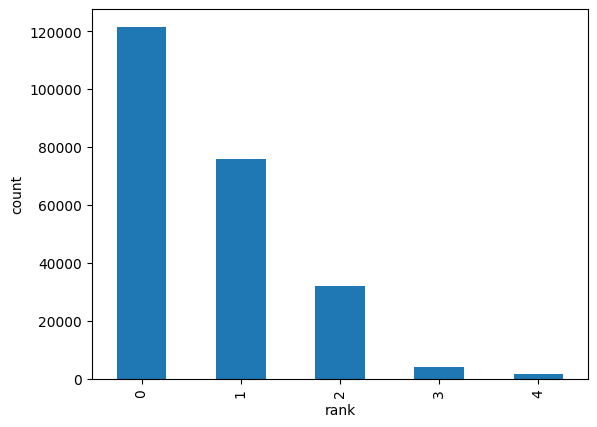

In [8]:
import matplotlib.pyplot as plt

df['rank'].value_counts().plot(kind='bar')
plt.xlabel('rank')
plt.ylabel('count')

plt.xticks(rotation=90)

plt.show()

Как мы видим ранки не сбалансированны

In [9]:
X = df.drop(['rank', 'query_id'], axis=1)  # Features
y = df['rank']  # Target (rank)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # разделяем данные на трейн и тест

### Теперь попробуем использовать разные модели для обучения и предсказания и выберем лучшее

### XGBClassifier

In [10]:
import xgboost as xgb
from sklearn.metrics import ndcg_score


model = xgb.XGBClassifier() # Создание модели
model.fit(X_train, y_train) # Обучение

# Предсказание ранга на тестовых данных
y_pred = model.predict(X_test)

# Вычисление метрики NDCG
ndcg = ndcg_score([y_test], [y_pred], k=5)
print("NDCG@5:", ndcg)


NDCG@5: 0.7948275862068964


Как мы видим качество на тестовой выборке неплохое, но и не самое лучшее

### Logistic regression

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ndcg_score

logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

y_pred_logreg = logreg_model.predict(X_test)

ndcg_logreg = ndcg_score([y_test], [y_pred_logreg], k=5)
print("NDCG@5 for Logistic Regression:", ndcg_logreg)


NDCG@5 for Logistic Regression: 0.11351159739347748


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Как мы видим логистическая регрессия плохо решает нашу задачу

In [15]:
np.unique(y_pred)
#Действительно мы в предсказывании получаем ранк, который может принимать только значения 0,1,2,3 или 4

array([0, 1, 2, 3, 4])